<a href="https://colab.research.google.com/github/nathrod/Hepatitis-C-Prediction/blob/main/Hepatitis_C_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hepatitis C Prediction


## 📌 Introdução

A hepatite C é uma infecção viral que provoca um processo inflamatório no fígado, podendo se manifestar na forma aguda ou crônica. O vírus HCV é transmitido pelo contato com sangue infectado. No entanto, muitas pessoas com hepatite C não sabem que têm a doença, principalmente porque os sintomas podem levar décadas para se manifestar. Devido á esse fator, essa doença aumenta o risco de desenvolvimento de fibrose e cirrose.

Em geral, a hepatite C é descoberta em sua fase crônica. Normalmente, o diagnóstico ocorre após teste rápido de rotina ou por doação de sangue.

#### Objetivos:

* Prever quem tem ou não a doença através de dados de doadores de sangue.
* Identificar qual é a relação dos dados laboratoriais com a presença ou não da doença e qual variável influencia mais no diagnóstico ou desenvolvimento da doença.

#### 📊 Descrição das Colunas:

> Valores laboratoriais de doadores de sangue e pacientes com hepatite C. [[Kaggle](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset/data)]  

> O atributo alvo para classificação é Categoria (2): doadores de sangue vs. pacientes com hepatite C (incluindo seu progresso ('apenas' hepatite C, fibrose, cirrose).

1. ***X*** (Paciente ID/N°)
2. ***Categoria*** (Diagnóstico). Pode ser:

    *   0 - Doador de Sangue
    *   0s - Possivel doador de Sangue
    *   1 - Hepatite
    *   2 - Fibrose
    *   3 - Cirrose
3. ***Idade*** (em anos)
4. ***Sexo*** (f,m)  

Atribuos 5 a 14 referem-se a dados laboratoriais:
5. ***ALB*** - Exame de Albumina
6. ***ALP*** - Fosfatase alcalina
7. ***ALT*** - Alanina Transaminase
8. ***AST*** - Aspartato Transaminase
9. ***BIl*** - Bilirrubina
10. ***CHE*** - Acetilcolinesterase
11. ***CHOL*** - Colesterol
12. ***CREA*** - Creatina
13. ***GGT*** - Gama-Glutamil Transferase
14. ***PROT*** - Proteínas Totais


### 📋Visão geral dos dados laboratoriais



Os dados laboratoriais avaliam a função hepática e monitoram o progresso da Hepatite C, indicando alterações funcionais no fígado. Ajudam a distinguir entre doadores de sangue saudáveis e pacientes com diferentes estágios da doença.

|         Exame        |Faixa Ideal*                            |Problemas                          |
|:------------------------------:|:-------------------------------:|:-----------------------------:|
|ALB - Albumina           |35 a 50 g/L           |**Baixo**: Indica disfunção hepática grave.           |
|ALP - Fosfatase Alcalina          |46 a 120 U/L            | **Alto**:   Pode indicar obstrução biliar, doenças do fígado ou ossos.            |
|ALT - Alanina Transaminase          |7 a 56 U/L           |**Alto**: Indicativo de dano hepático.|
|AST - Aspartato Transaminase          |5 a 40 U/L           |**Alto**: Sinal de lesão hepática ou muscular.|
|BIl - Bilirrubina          |até 1,2 mg/dL          |**Alto**: Indica disfunção hepática ou problemas nos ductos biliares.|
|CHE - Acetilcolinesterase          |Homens: 4620 - 11500 U/L <br><br> Mulheres: 3930 - 10800 U/L          |**Baixo**: Pode indicar insuficiência hepática grave.|
|CHOL - Colesterol          |150 a 200 mg/dL          |**Alto**: Pode ser indicativo de problemas no metabolismo lipídico, frequentemente relacionado a disfunções hepáticas. <br><br> **Baixo**: Pode ocorrer em doenças hepáticas graves, onde o fígado não consegue produzir colesterol adequadamente.|
|CREA - Creatina          |0,60 a 1,3 mg/dL          |**Alto**: Indicativo de problemas renais ou musculares.|
|GGT - Gama-Glutamil Transferase         |Homens: 12 - 64 UI/L <br><br> Mulheres: 9 e 36 UI/L          |**Alto**: Sinal de problemas hepáticos, como hepatite C, obstrução biliar ou consumo excessivo de álcool.|
|PROT - Proteínas Totais         |6,0 a 8,3 g/dL         |**Alto**: Pode ser relacionado a doenças inflamatórias crônicas ou desidratação. <br><br> **Baixo**: Pode indicar disfunção hepática grave, onde o fígado não consegue produzir proteínas suficientes.|


**Os valores obtidos podem variar de acordo com o laboratório, conforme indicado em [Tua Saúde](https://www.tuasaude.com/t/exames/).*





#### Importando as bibliotecas necessárias e carregando o arquivo .csv

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
# Download latest version
path = kagglehub.dataset_download("fedesoriano/hepatitis-c-dataset")

print("Caminho para o .csv:", path)

Caminho para o .csv: /root/.cache/kagglehub/datasets/fedesoriano/hepatitis-c-dataset/versions/1


In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/fedesoriano/hepatitis-c-dataset/versions/1/HepatitisCdata.csv"

data = pd.read_csv(dataset_path)
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## 🔍 Análise Exploratória dos Dados

Informações gerais do dataset para termos uma noção dos tipos de variáveis, valores nulos e um resumo estatístico.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


Para entendermos a coluna Categoria, vamos verificar os valores unicos

In [ ]:
data['Category'].value_counts()

,count
Category,
0=Blood Donor,533
3=Cirrhosis,30
1=Hepatitis,24
2=Fibrosis,21
0s=suspect Blood Donor,7


In [ ]:
data['Sex'].value_counts()

,count
Sex,
m,377
f,238


In [ ]:
data.duplicated().sum()

0

Avaliar a distribuição de idades dos pacientes irá nos ajudar a entender como a variedade e a distribuição dos dados laboratoriais podem estar relacionadas às diferentes faixas etárias.

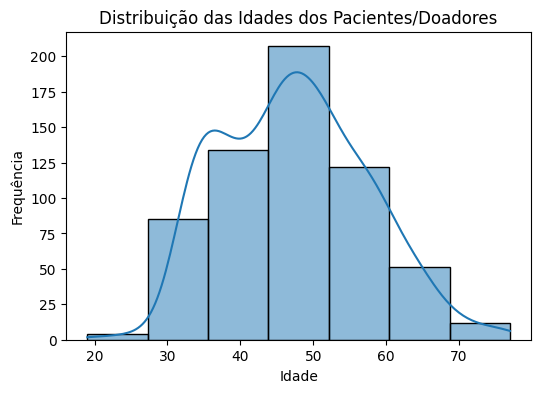

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], kde=True, bins=7) # bins 77-19
plt.title('Distribuição das Idades dos Pacientes/Doadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Como as enzimas ALT e AST são as enzimas do fígado que costumam apresentar níveis elevados em condições hepaticas, vale a penas analisar a distruibuição delas em relação as categorias

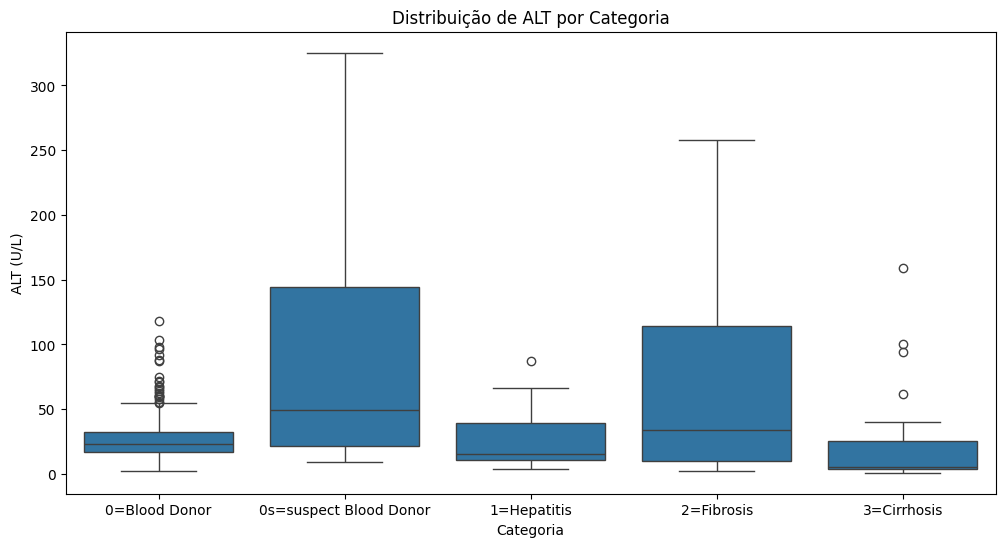

In [ ]:
#ALT por Categoria, será que seria mais interessante verificar isso após o pré processamento?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='ALT', data=data)
plt.title('Distribuição de ALT por Categoria')
plt.xlabel('Categoria')
plt.ylabel('ALT (U/L)')
plt.show()

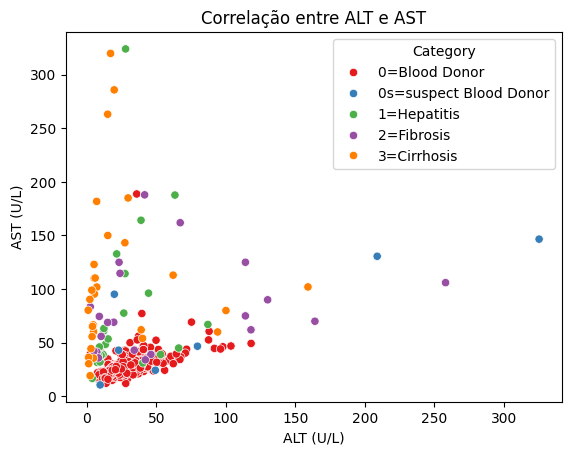

In [ ]:
#gráfico de dispersão entre ALT e AST
sns.scatterplot(x='ALT', y='AST', data=data, hue='Category', palette='Set1')
plt.title('Correlação entre ALT e AST')
plt.xlabel('ALT (U/L)')
plt.ylabel('AST (U/L)')
plt.show()

## 🎲 Pré-processamento dos dados


1. Transformar categorias em valores numericos

2. Excluir a primeira coluna ID, pois não faz diferença nenhuma na analise do id do paciente e está servindo como  o index do dataset

3. Mapa de calor após esse pré processamento


In [ ]:
#Remover a coluna ID
data.drop("Unnamed: 0" , axis = 1 , inplace=True)
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Vamos transformar as categorias em valores numericos entre quem tem e quem não tem a doença, portanto Hepatite, Cirrose e Fibrose serão considerados como true. Assim poderemos trabalhar com a classificação binária.

In [ ]:
data['Category'] = data['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

In [ ]:
data['Sex'] = data['Sex'].map({'m': 1, 'f': 0})

Por fim vamos tratar os valores nulos

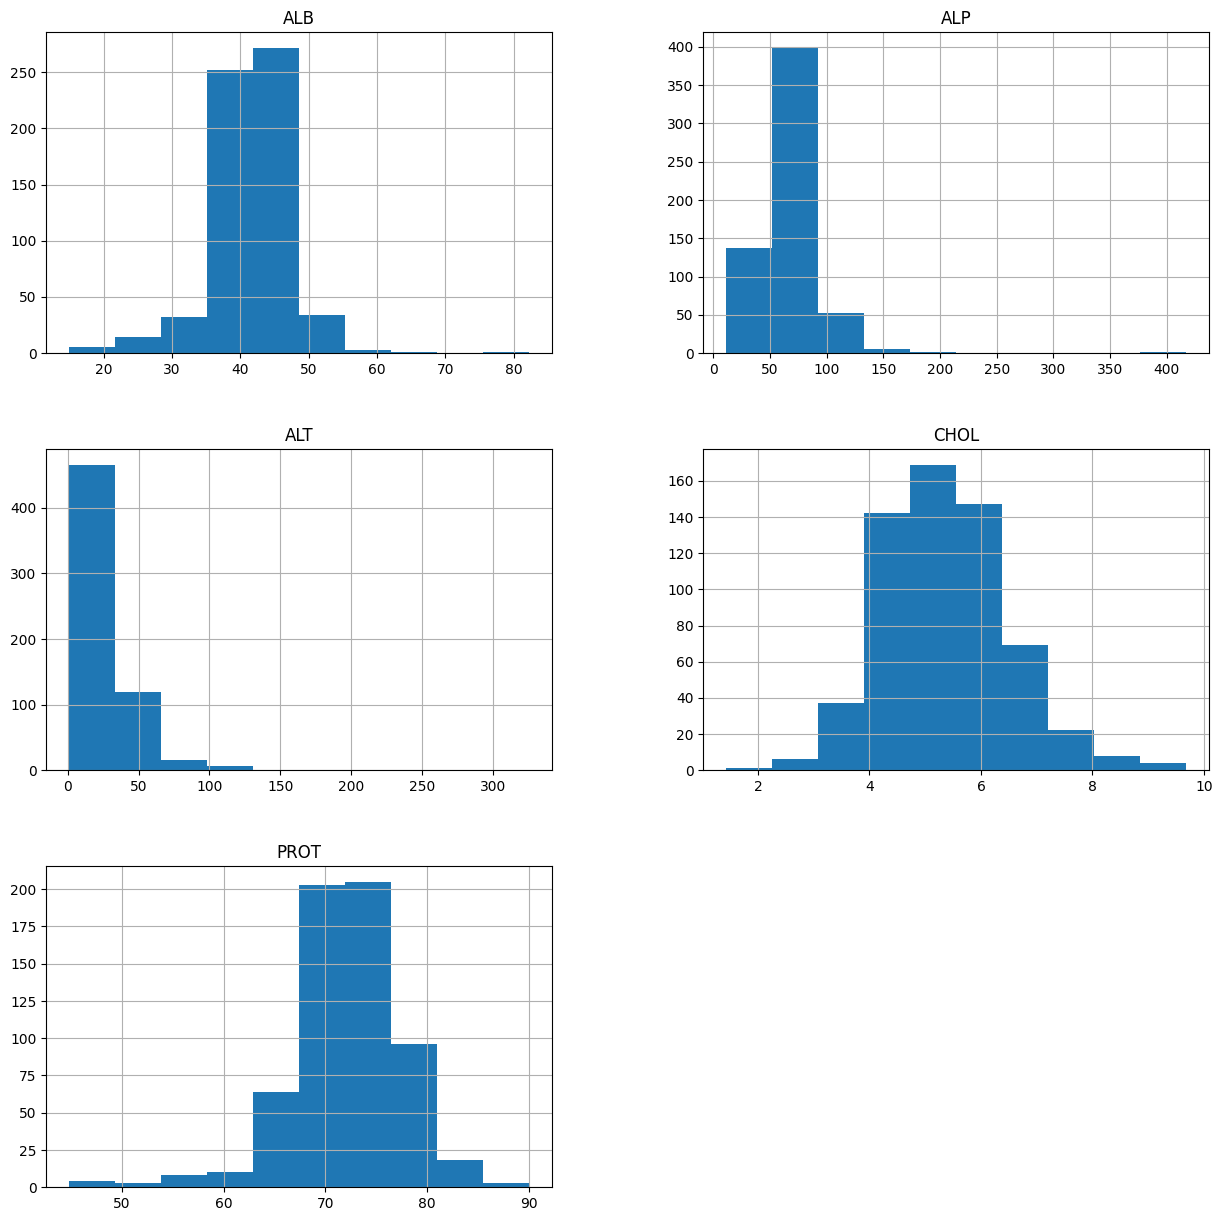

In [ ]:
atributos_nulos = ['ALB','ALP','ALT','CHOL','PROT']
data_nulos = data[atributos_nulos]
p = data_nulos.hist(figsize= (15,15))

In [ ]:
data['ALB'].fillna(data['ALB'].mean(), inplace=True)
data['ALP'].fillna(data['ALP'].median(), inplace=True)
data['ALT'].fillna(data['ALT'].median(), inplace=True)
data['CHOL'].fillna(data['CHOL'].mean(), inplace=True)
data['PROT'].fillna(data['PROT'].mean(), inplace=True)

<ipython-input-136-9fa912419c10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ALB'].fillna(data['ALB'].mean(), inplace=True)
<ipython-input-136-9fa912419c10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
corr = data.corr()
corr

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.037781,0.071663,-0.179859,-0.067737,0.087787,0.621724,0.398451,-0.230785,-0.265474,0.136772,0.437680,0.083956
Age,0.037781,1.000000,-0.024544,-0.197005,0.168080,-0.005690,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087,-0.153665
Sex,0.071663,-0.024544,1.000000,0.146065,-0.019808,0.161502,0.130891,0.111177,0.169111,-0.029886,0.159589,0.133276,0.051250
ALB,-0.179859,-0.197005,0.146065,1.000000,-0.138008,0.001402,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555,0.550033
ALP,-0.067737,0.168080,-0.019808,-0.138008,1.000000,0.166320,0.059637,0.046780,0.033750,0.123590,0.149831,0.440012,-0.055865
ALT,0.087787,-0.005690,0.161502,0.001402,0.166320,1.000000,0.273333,-0.038388,0.146729,0.067825,-0.043000,0.248208,0.094954
AST,0.621724,0.088666,0.130891,-0.193397,0.059637,0.273333,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.039888
BIL,0.398451,0.032492,0.111177,-0.221650,0.046780,-0.038388,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.041309
CHE,-0.230785,-0.075093,0.169111,0.375848,0.033750,0.146729,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.293184
CHOL,-0.265474,0.123978,-0.029886,0.204803,0.123590,0.067825,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206546


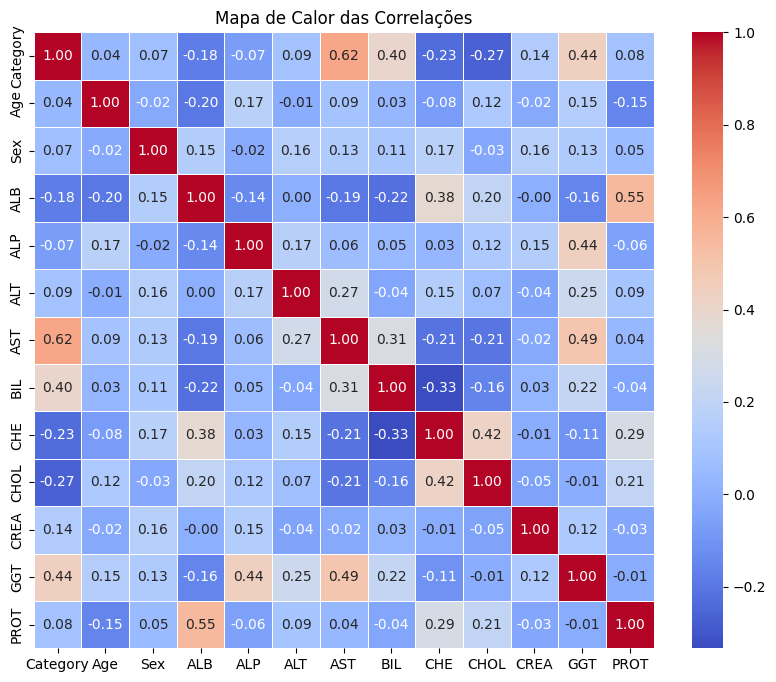

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Mapa de Calor das Correlações")
plt.show()

In [ ]:
y = data['Category']
X = data.drop('Category', axis=1)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

## 🍀 Treinamento dos modelos

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

### Arvore de Decisão

In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=2,
    criterion='gini',
    random_state=42
)

dt_classifier.fit(X_treino, y_treino)

pred_dt = dt_classifier.predict(X_teste)

# Avaliação
print(classification_report(y_teste, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       110
           1       0.88      0.54      0.67        13

    accuracy                           0.94       123
   macro avg       0.91      0.76      0.82       123
weighted avg       0.94      0.94      0.94       123



In [ ]:
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, pred_dt))

Matriz de Confusão:
[[109   1]
 [  6   7]]


Verdadeiros positivos  
Falsos negativos  
Falsos positivos     
Verdadeiros negativos   

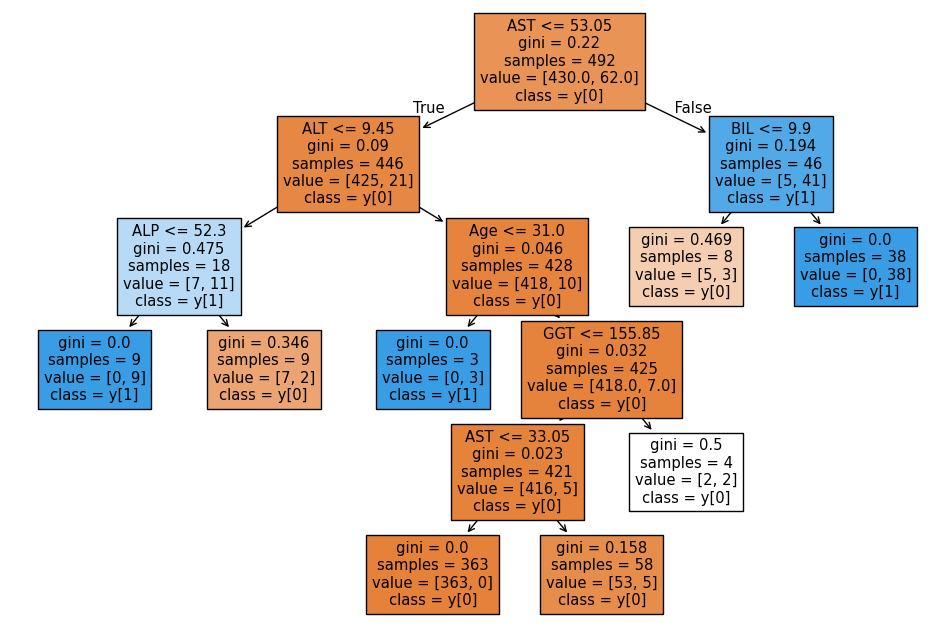

In [ ]:
# Visualização da árvore
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X_treino.columns, class_names=True, filled=True)
plt.show()

###  Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

Qual seria o número ideal de arvores para o nosso modelo?  

Vamos analisar isso a partir do calculo da acurácia média com validação cruzada.
VC - Reduzir overfitting, diferentes divisões.

In [ ]:
def get_score(n_estimators):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)

    my_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])

    scores = cross_val_score(my_pipeline, X_treino, y_treino, cv=3, scoring='accuracy')
    return scores.mean()

In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400]
results = {}
for i in n_estimators:
    score = get_score(i)
    results[i] = score

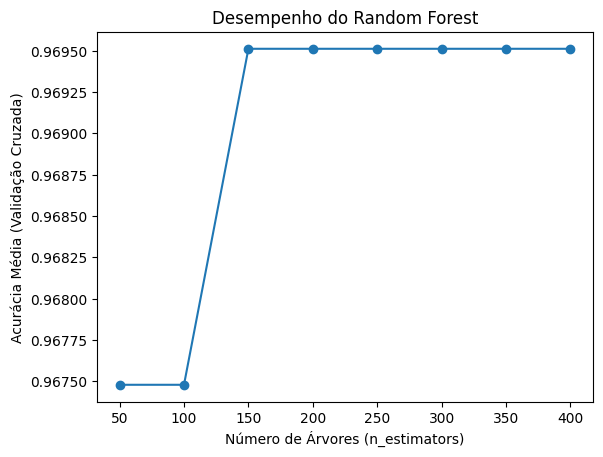

In [ ]:
# Plotando o desempenho em função do número de árvores
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Acurácia Média (Validação Cruzada)')
plt.title('Desempenho do Random Forest')
plt.show()

Portanto, podemos utilizar 150, pois a partir dese valor a acuracia média aumenta e permanece constante.

StandardScaler -> Média: 0; Desvio Padrão: 1

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=150, random_state=0)

rfc_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model_rfc)])

rfc_pipeline.fit(X_treino, y_treino)

rfc_preds = rfc_pipeline.predict(X_teste)

# Avaliação
print("Relatório de Classificação:")
print(classification_report(y_teste, rfc_preds))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.92      0.85      0.88        13

    accuracy                           0.98       123
   macro avg       0.95      0.92      0.93       123
weighted avg       0.98      0.98      0.98       123



In [ ]:
# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, rfc_preds))

Matriz de Confusão:
[[109   1]
 [  2  11]]


### XGBoost Clasifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
model_xgb = XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, eval_metric='logloss', use_label_encoder=False)

model_xgb.fit(X_treino, y_treino)

pred_xgb = model_xgb.predict(X_teste)

scores_xgb = cross_val_score(model_xgb, X_treino, y_treino, cv=5, scoring='accuracy')
print("Cross-Validated Accuracy: ", scores_xgb.mean())


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validated Accuracy:  0.9735724592867449


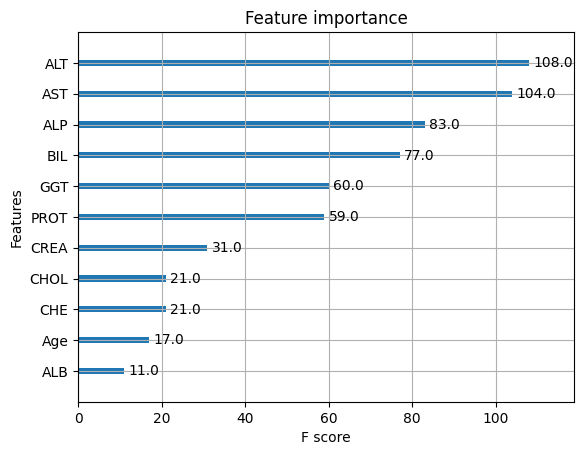

In [ ]:
plot_importance(model_xgb)
plt.show()

ALT, AST, ALP e BIL - Maior relevância

In [ ]:
# Matriz de confusão
print(confusion_matrix(y_teste, pred_xgb))

[[110   0]
 [  2  11]]


In [ ]:
# Avaliação
print("Relatório de Classificação:")
print(classification_report(y_teste, pred_xgb))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123



A classe 0 (não doentes) teve um desempenho quase perfeito. Isso pode indicar que a predição foi muito boa ou que não houve um tratamento de dados adequandos, ou ainda que temos poucos dados de pessoas doentes e muitos dados de pessoas não doentes.

## 📎Avaliação dos modelos




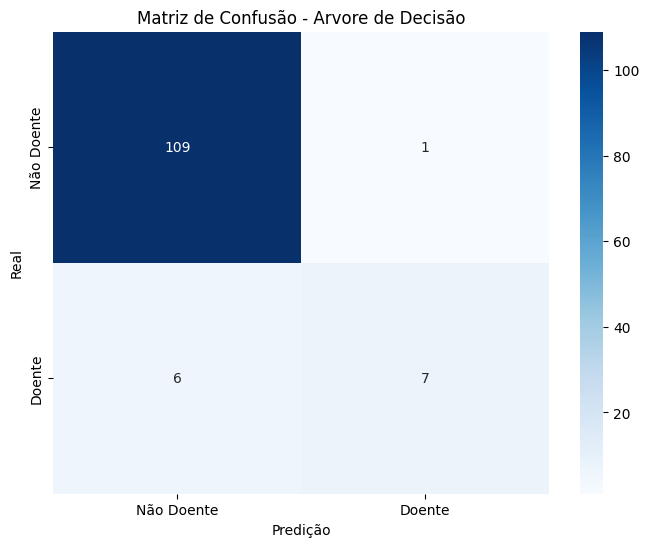

In [ ]:
cm = confusion_matrix(y_teste, pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=['Não Doente', 'Doente'],
              yticklabels=['Não Doente', 'Doente'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Arvore de Decisão')
plt.show()

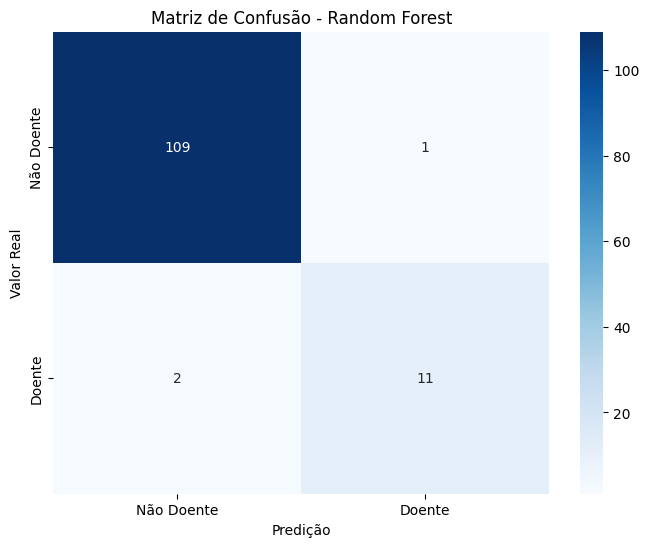

In [ ]:
cm = confusion_matrix(y_teste, rfc_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Doente', 'Doente'],
            yticklabels=['Não Doente', 'Doente'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

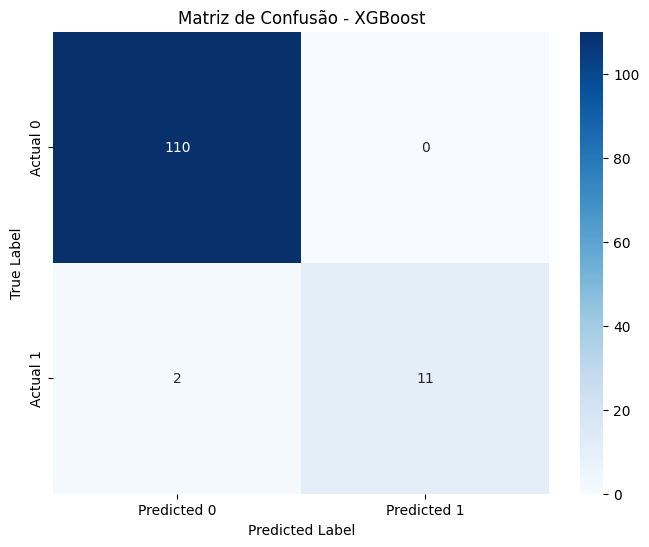

In [ ]:
cm = confusion_matrix(y_teste, pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Referencias Bibliograficas:



1. BRASIL. Saúde de A a Z: Hepatite C. Disponível em: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/h/hepatites-virais/hepatite-c

2. SORIANO, Federico. Hepatitis C Prediction Dataset. Kaggle, 2021. Disponível em: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset

3. BRASIL. Ministério da Saúde. Hepatite C. Disponível em: https://antigo.aids.gov.br/pt-br/publico-geral/hv/o-que-sao-hepatites/hepatite-c

4. TUA SAÚDE. Exames. Disponível em: https://www.tuasaude.com/t/exames/
